Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df =pd.read_csv("C:\\Users\\hansi\\Downloads\\shopping_trends (1).csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.shape

(3900, 19)

Data Preprocessing

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [12]:
df['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

EDA-
Each plot gives meaningful inference about the shopping trends of the customers.

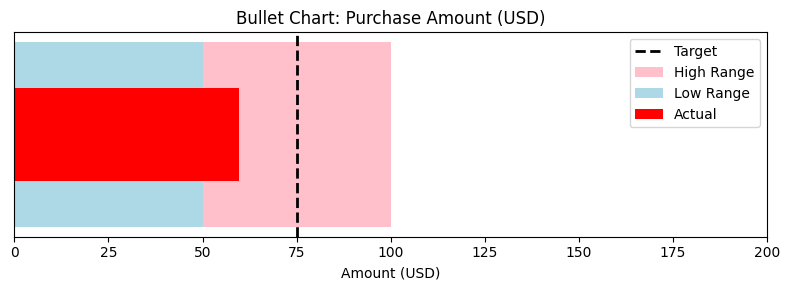

In [13]:
target = 75
actual = df['Purchase Amount (USD)'].mean()
low_range = 50
medium_range = 100
fig, ax = plt.subplots(figsize=(8, 3))
ax.barh(y=0, width=medium_range, height=0.8, color='pink', label='High Range')
ax.barh(y=0, width=low_range, height=0.8, color='lightblue', label='Low Range')
ax.axvline(x=target, color='black', linewidth=2, linestyle='--', label='Target')
ax.barh(y=0, width=actual, height=0.4, color='red', label='Actual')
ax.set_xlim(0, 200)
ax.set_xlabel('Amount (USD)')
ax.set_title('Bullet Chart: Purchase Amount (USD)')
ax.get_yaxis().set_visible(False)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

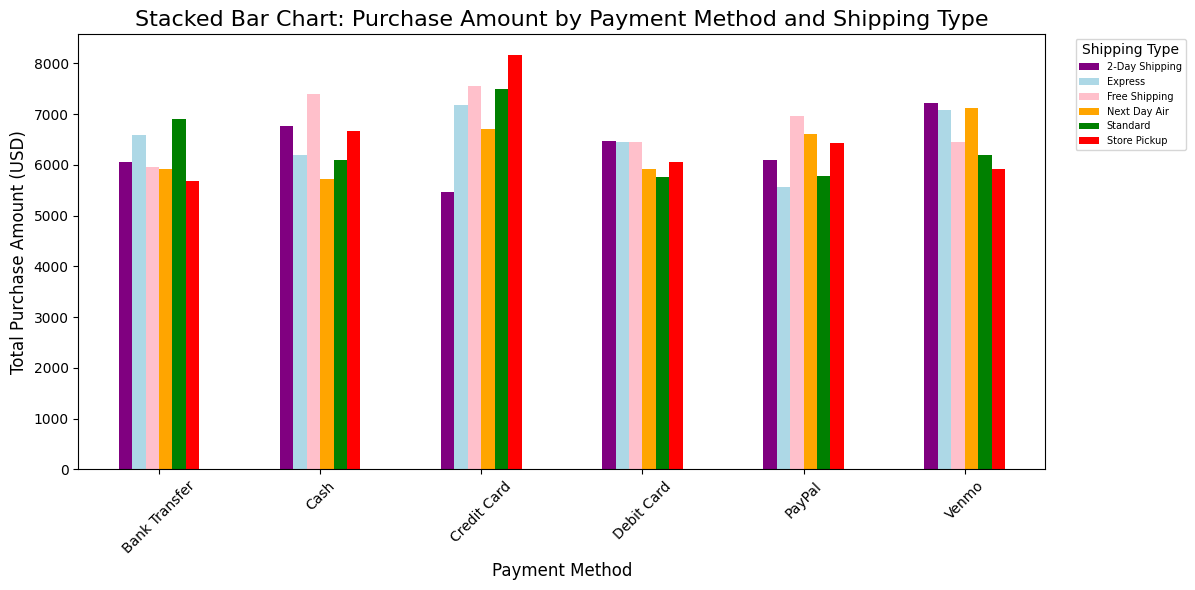

In [14]:

grouped_data = df.groupby(['Payment Method', 'Shipping Type'])['Purchase Amount (USD)'].sum().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6), color=['purple', 'lightblue', 'pink', 'orange', 'green', 'red'])
plt.title('Stacked Bar Chart: Purchase Amount by Payment Method and Shipping Type', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.legend(title='Shipping Type', fontsize=7, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

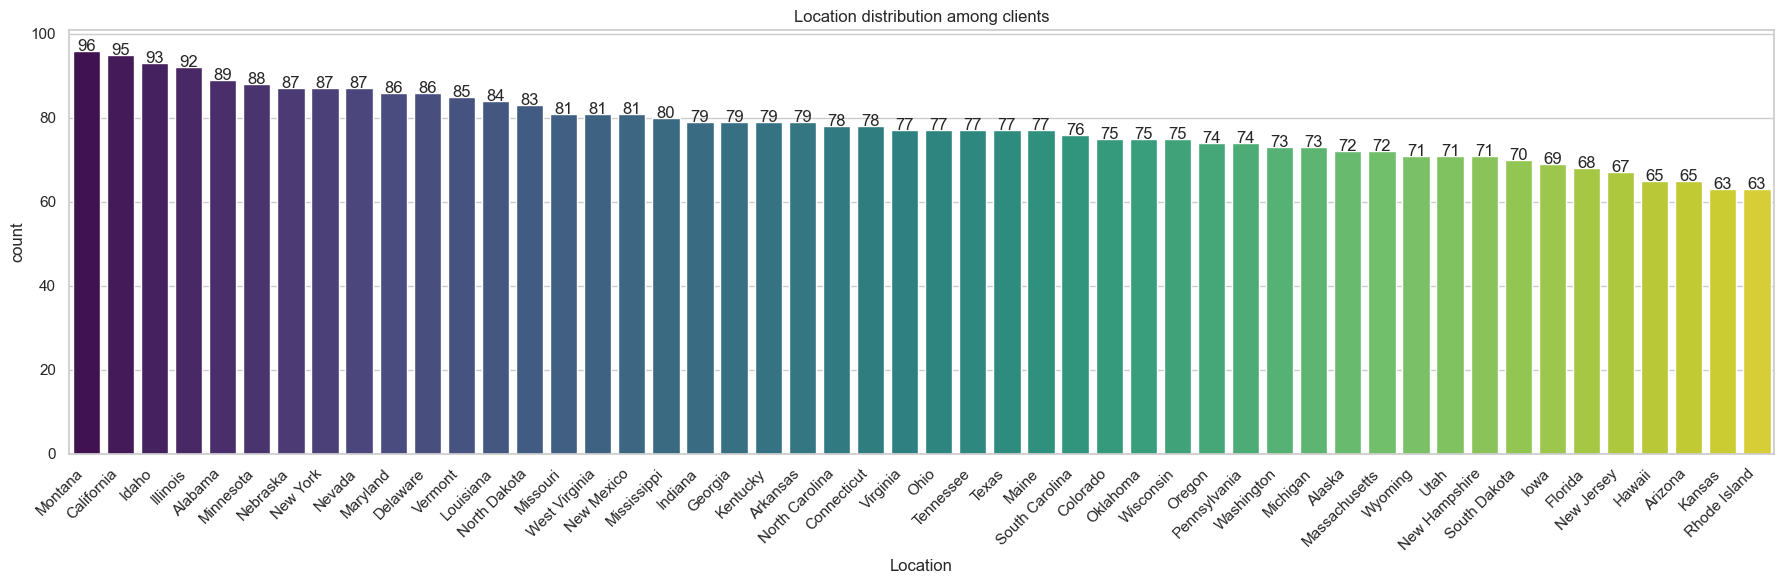

In [15]:

sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index,palette="viridis")
ax.set_title('Location distribution among clients')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.tight_layout()
plt.show()

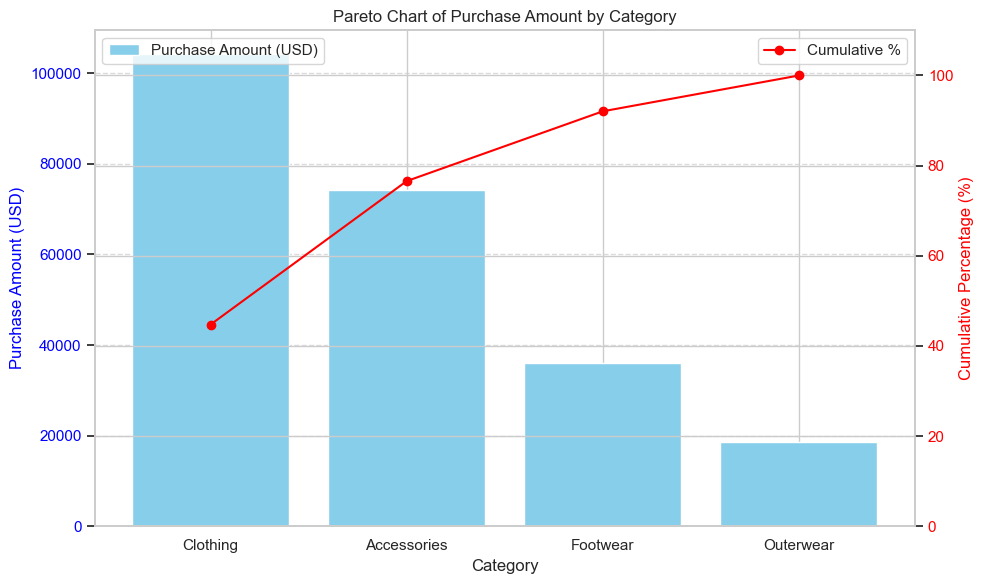

In [16]:

category_sum = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
cumulative_sum = category_sum.cumsum()
cumulative_percentage = 100 * cumulative_sum / category_sum.sum()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(category_sum.index, category_sum.values, color='skyblue', label='Purchase Amount (USD)')
ax1.set_xlabel('Category')
ax1.set_ylabel('Purchase Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Pareto Chart of Purchase Amount by Category')
ax2 = ax1.twinx()
ax2.plot(category_sum.index, cumulative_percentage, color='red', marker='o', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [17]:
import plotly.express as px
sunburst_data = df.groupby(['Category', 'Item Purchased', 'Season']).size().reset_index(name='Count')
fig = px.sunburst(
    sunburst_data,
    path=['Category', 'Item Purchased', 'Season'],
    values='Count',
    title='Sunburst Chart of Shopping Trends',
    color='Category',
)

fig.update_layout(
    legend_title="Product Categories",
    legend=dict(
        x=1,
        y=1,
        traceorder="normal",
        orientation="v",
        bgcolor="rgba(255, 255, 255, 0.7)",
        borderwidth=1,
    ),
    width=1000,
    height=800,
)
fig.show()

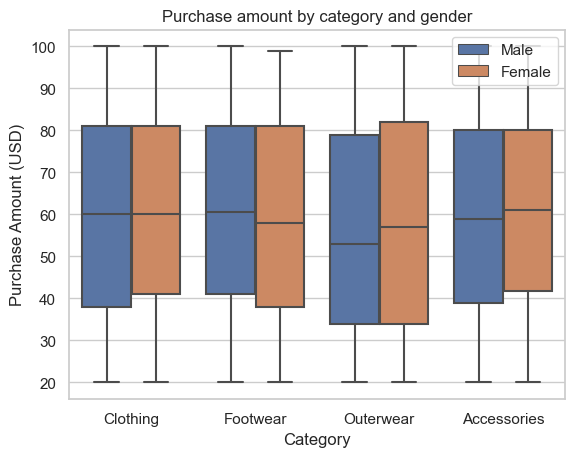

In [18]:
sns.boxplot(x='Category',y='Purchase Amount (USD)',data=df,hue='Gender')
plt.title('Purchase amount by category and gender')
plt.legend(loc='upper right')
plt.show()

In [19]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [20]:
seasons = df["Season"].unique()
categories = df["Category"].unique()
fig = go.Figure()

for season in seasons:
    season_data = df[df["Season"] == season]
    category_counts = season_data["Category"].value_counts()
    fig.add_trace(
        go.Bar(
            x=category_counts.index,
            y=category_counts.values,
            name=season,
            visible=(season == seasons[0])
        )
    )
slider_steps = []
for i, season in enumerate(seasons):
    slider_steps.append(
        dict(
            method="update",
            args=[
                {"visible": [j == i for j in range(len(seasons))]},
                {"title": f"Category distribution for {season}"}
            ],
            label=season
        )
    )
fig.update_layout(
    title=f"Category distribution for {seasons[0]}",
    xaxis_title="Category",
    yaxis_title="Count",
    sliders=[{
        "active": 0,
        "currentvalue": {"prefix": "Season: "},
        "pad": {"t": 50},
        "steps": slider_steps
    }]
)
fig.show()


In [21]:
import plotly.io as pio

In [22]:
grouped_data = df.groupby(["Location", "Frequency of Purchases", "Gender"]).size().reset_index(name="Count")
fig = px.scatter(
    grouped_data,
    x="Location",
    y="Count",
    color="Gender",
    facet_col="Frequency of Purchases",
    title="Purchases by location and frequency grouped by gender",
    labels={"Count": "Number of Purchases"},
)
fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Number of Purchases",
    legend_title="Gender",
    title_x=0.5,
    height=600,
    width=2000,
)
fig.show()


In [23]:

selected_columns = [ "Purchase Amount (USD)", "Gender","Review Rating","Season"]
df_selected = df[selected_columns]
df_encoded = df_selected.copy()
for col in ["Gender", "Season"]:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes
fig = px.parallel_coordinates(
    df_encoded,
    dimensions=selected_columns[:-2] + ["Gender", "Season"],
    color="Review Rating",
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={col: col for col in selected_columns},
    title="Parallel coordinates chart of dataset features",
)

fig.show()


In [24]:
bins = [0, 18, 30, 45, 60, 100]
labels = ["0-18", "19-30", "31-45", "46-60", "60+"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
bubble_data = df.groupby(["Age Group", "Color"]).size().reset_index(name="Count")
fig = px.scatter(
    bubble_data,
    x="Color",
    y="Age Group",
    size="Count",
    color="Count",
    title="Popularity of colors across age groups",
    labels={"Count": "Number of Purchases", "Color": "Color", "Age Group": "Age Group"},
    color_continuous_scale="Sunset",
    size_max=40,
    height=600,
    width=1000,
)
fig.update_layout(
    xaxis_title="Color",
    yaxis_title="Age Group",
    title_x=0.5,
)
fig.show()


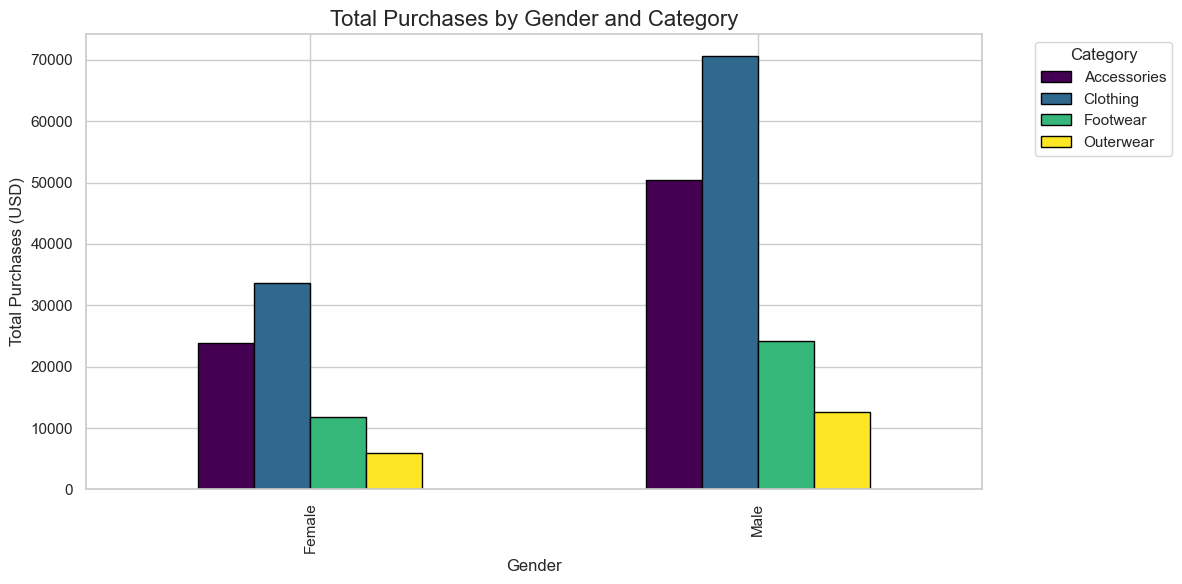

In [25]:
grouped_data = df.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().unstack()
grouped_data.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

plt.title('Total Purchases by Gender and Category', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Purchases (USD)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

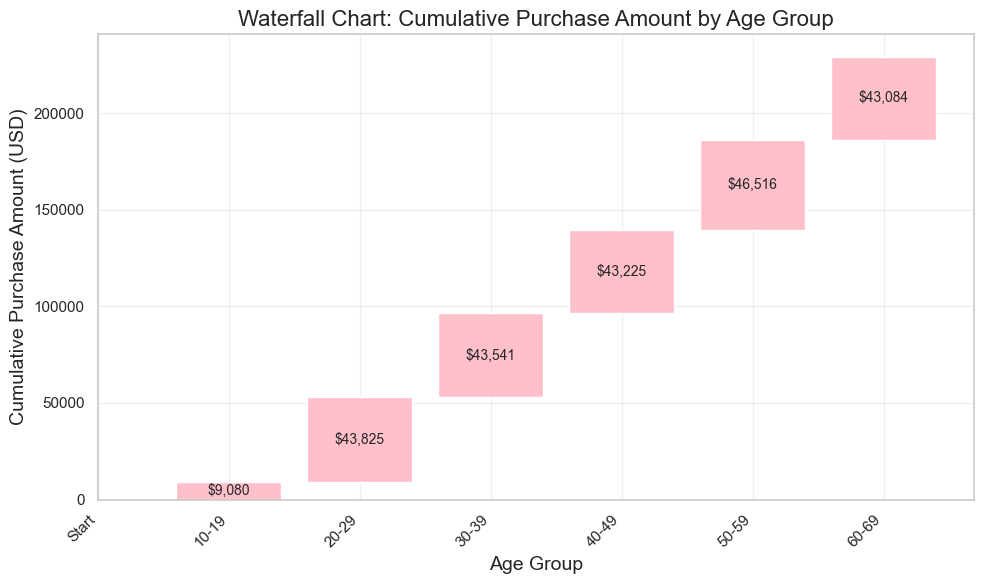

In [26]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_group_purchase = df.groupby('AgeGroup')['Purchase Amount (USD)'].sum().reset_index()
values = age_group_purchase['Purchase Amount (USD)'].values
labels = age_group_purchase['AgeGroup'].astype(str).values
cumulative = np.cumsum(values)
values = np.insert(values, 0, 0)
cumulative = np.insert(cumulative, 0, 0)
labels = np.insert(labels, 0, "Start")


plt.figure(figsize=(10, 6))
for i in range(1, len(values)):
    color = 'pink' if values[i] > 0 else 'red'
    plt.bar(i, values[i], bottom=cumulative[i - 1], color=color)
for i in range(1, len(values)):
    plt.text(i, cumulative[i] - values[i] / 2, f'${int(values[i]):,}', ha='center', va='center', fontsize=10)

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.title('Waterfall Chart: Cumulative Purchase Amount by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Cumulative Purchase Amount (USD)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

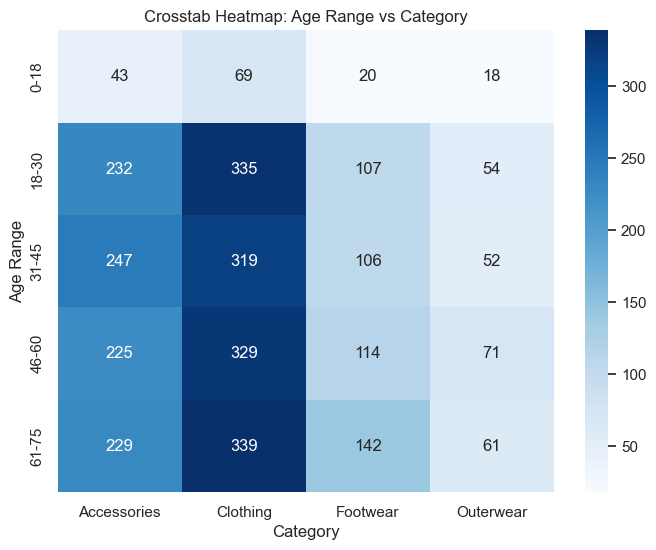

In [27]:
bins = [10, 20, 30, 40, 50, 60]
labels = ['0-18', '18-30', '31-45', '46-60', '61-75']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels,right=False)
crosstab = pd.crosstab(df['Age Range'], df['Category'])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)
plt.title("Crosstab Heatmap: Age Range vs Category")
plt.show()

In [28]:
fig = px.parallel_categories(
    df,
    dimensions=["Season", "Frequency of Purchases", "Category"],
    title="Relationships Between Season, Frequency of Purchases, and Category",
    color_continuous_scale=px.colors.sequential.Inferno
)

fig.show()

In [29]:
purchase_counts = df.groupby(["Season", "Frequency of Purchases"]).size().reset_index(name="Count")
fig = px.bar(
    purchase_counts,
    x="Season",
    y="Count",
    color="Frequency of Purchases",
    title="Frequency of Purchases Across Seasons",
    labels={"Count": "Number of Purchases", "Season": "Season"},
    barmode="group"
)
fig.show()

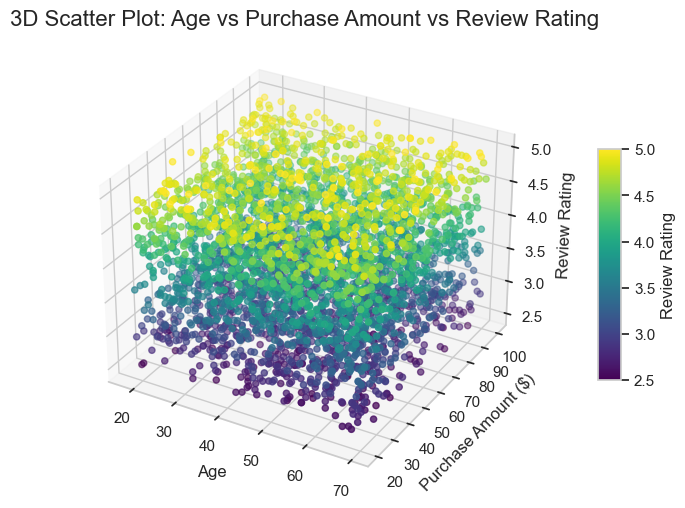

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Purchase Amount (USD)'], df['Review Rating'], c=df['Review Rating'], cmap='viridis', label='Review Rating')
ax.set_title("3D Scatter Plot: Age vs Purchase Amount vs Review Rating", fontsize=16)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Purchase Amount ($)", fontsize=12)
ax.set_zlabel("Review Rating", fontsize=12)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, fraction=0.04, pad=0.08)
cbar.set_label('Review Rating', fontsize=12)
plt.show()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64


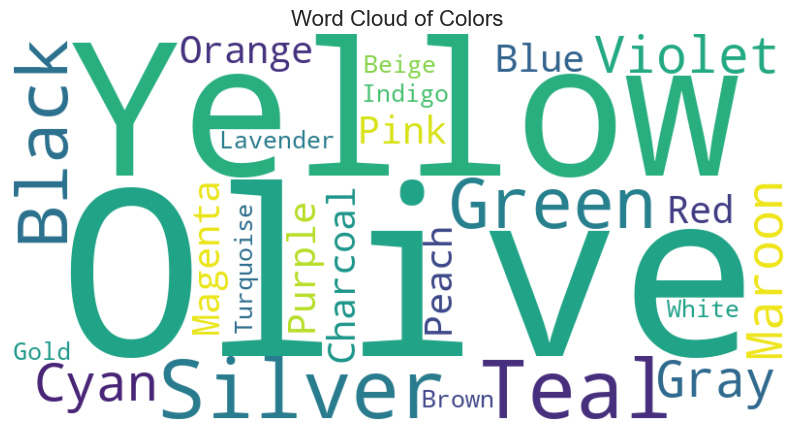

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

color_counts = df['Color'].value_counts()
print(color_counts)
color_text = " ".join(df['Color'])
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(color_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Colors", fontsize=16)
plt.show()

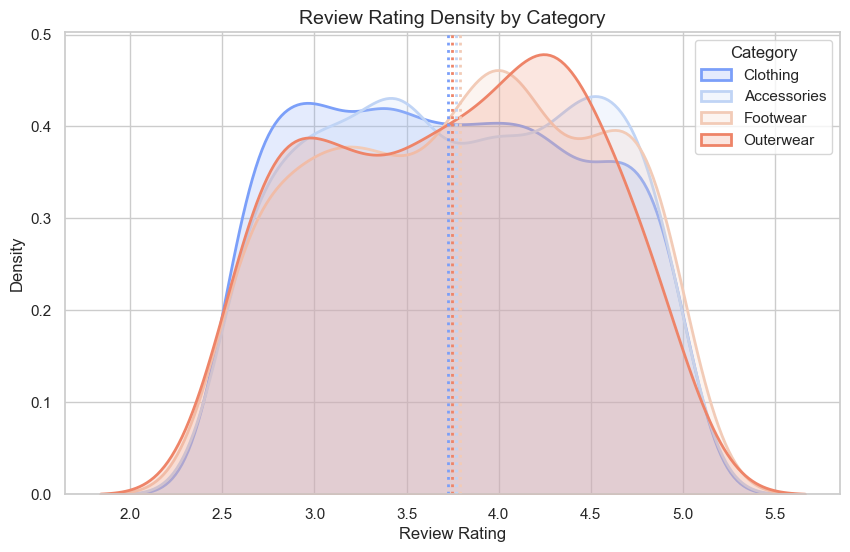

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selected_categories = ["Clothing", "Accessories", "Footwear", "Outerwear"]
filtered_df = df[df["Category"].isin(selected_categories)]

plt.figure(figsize=(10, 6))

colors = sns.color_palette("coolwarm", len(selected_categories))

for i, cat in enumerate(selected_categories):
    subset = filtered_df[filtered_df["Category"] == cat]["Review Rating"].dropna()

    if not subset.empty:
        sns.kdeplot(subset, fill=True, alpha=0.2, linewidth=2, color=colors[i], label=cat)
        mean_value = np.mean(subset)
        plt.axvline(mean_value, linestyle="dotted", color=colors[i], linewidth=2)

plt.title("Review Rating Density by Category", fontsize=14)
plt.xlabel("Review Rating", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Category")
plt.show()

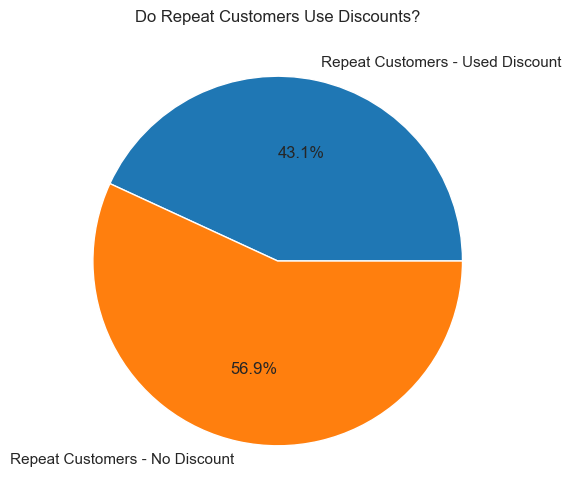

In [33]:
#discount
repeat_with_discount = df[(df['Previous Purchases'] > 1) & (df['Discount Applied'] == 'Yes')]
repeat_without_discount = df[(df['Previous Purchases'] > 1) & (df['Discount Applied'] == 'No')]

sizes = [len(repeat_with_discount), len(repeat_without_discount)]
labels = ['Repeat Customers - Used Discount', 'Repeat Customers - No Discount']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title("Do Repeat Customers Use Discounts?")
plt.show()

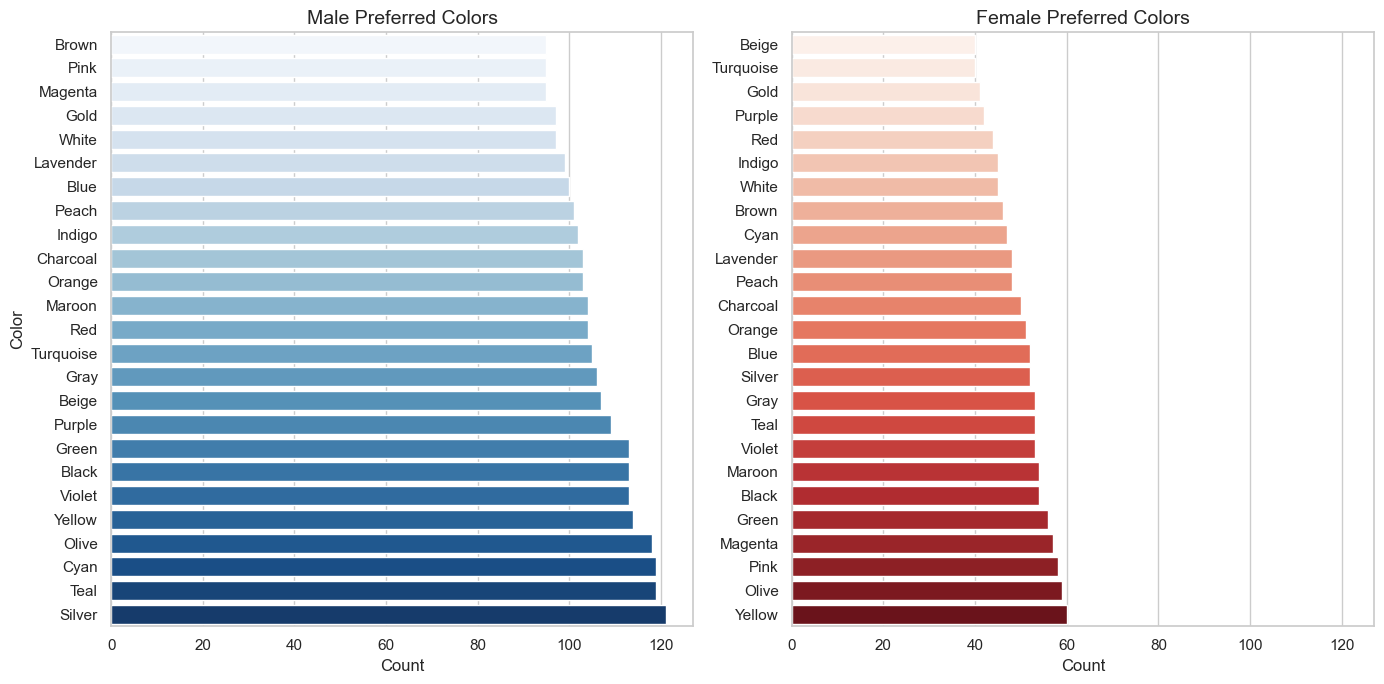

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

df_counts = df.groupby(['Color', 'Gender']).size().reset_index(name='Count')

df_male = df_counts[df_counts['Gender'] == 'Male'].sort_values(by='Count', ascending=True)
df_female = df_counts[df_counts['Gender'] == 'Female'].sort_values(by='Count', ascending=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharex=True)

male_palette = sns.color_palette("Blues", len(df_male))
female_palette = sns.color_palette("Reds", len(df_female))

sns.barplot(data=df_male, y="Color", x="Count", palette=male_palette, ax=axes[0])
axes[0].set_title("Male Preferred Colors", fontsize=14)
axes[0].set_xlabel("Count", fontsize=12)
axes[0].set_ylabel("Color", fontsize=12)

sns.barplot(data=df_female, y="Color", x="Count", palette=female_palette, ax=axes[1])
axes[1].set_title("Female Preferred Colors", fontsize=14)
axes[1].set_xlabel("Count", fontsize=12)
axes[1].set_ylabel("")
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

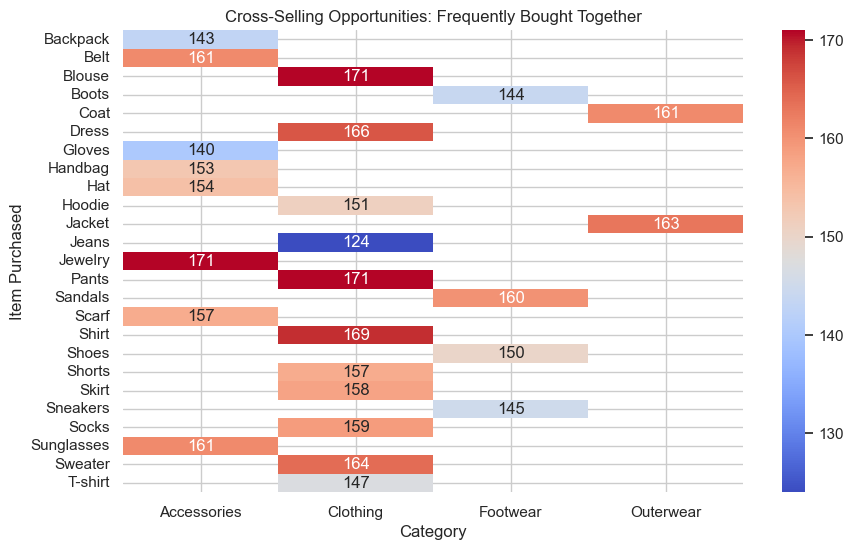

In [35]:
item_cross_sell = df.pivot_table(index='Item Purchased', columns='Category', values='Purchase Amount (USD)', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(item_cross_sell, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Cross-Selling Opportunities: Frequently Bought Together")
plt.show()

In [36]:
import plotly.express as px

df_treemap = df.groupby(['Age', 'Category']).size().reset_index(name='Count')

fig = px.treemap(df_treemap,
                  path=['Age', 'Category'],  # Hierarchy
                  values='Count',
                  color='Age',
                  color_continuous_scale='blues',
                  title="Preferred Product Categories by Age")

fig.show()

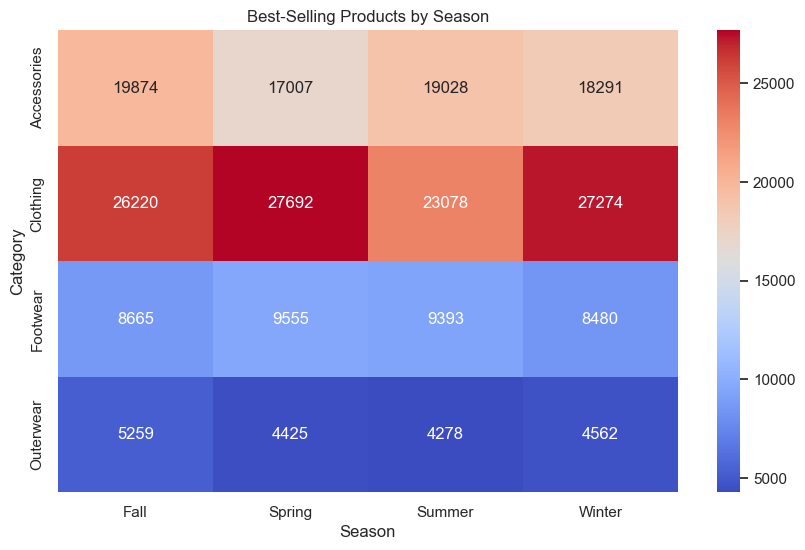

In [37]:
#hotselling product by season
plt.figure(figsize=(10, 6))
season_product_pivot = df.pivot_table(index='Category', columns='Season', values='Purchase Amount (USD)', aggfunc='sum')
sns.heatmap(season_product_pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Best-Selling Products by Season")
plt.show()

<Figure size 1000x600 with 0 Axes>

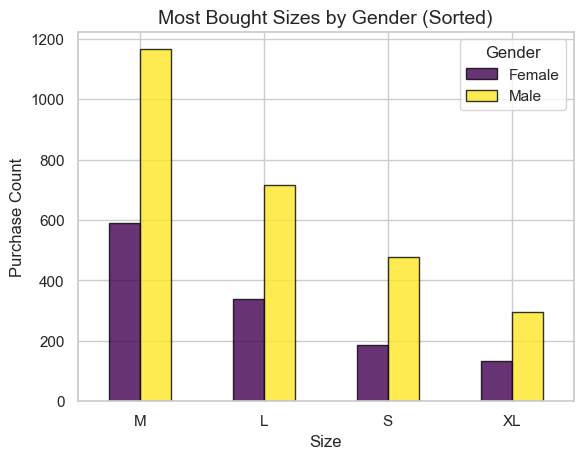

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

size_counts = df.groupby(["Size", "Gender"]).size().unstack()
size_counts["Total"] = size_counts.sum(axis=1)
size_counts = size_counts.sort_values("Total", ascending=False).drop(columns="Total")


plt.figure(figsize=(10, 6))
size_counts.plot(kind="bar", colormap="viridis", edgecolor="black", alpha=0.8)
plt.title("Most Bought Sizes by Gender (Sorted)", fontsize=14)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Purchase Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.show()

Prediction Models

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import numpy as np


data = pd.read_csv("C:\\Users\\hansi\\Downloads\\shopping_trends (1).csv")


features = ['Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Frequency of Purchases']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']),
        ('cat', OneHotEncoder(), ['Gender', 'Category', 'Frequency of Purchases'])
    ])

# Build the KNN model pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', NearestNeighbors(n_neighbors=5, metric='euclidean'))
])

# Fit the pipeline on the data
knn_pipeline.fit(data[features])
def recommend_customers(customer_id, n_recommendations=5):
    if customer_id not in data['Customer ID'].values:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return pd.DataFrame()

    customer_index = data[data['Customer ID'] == customer_id].index[0]
    transformed_data = knn_pipeline[:-1].transform(data[features])

    distances, indices = knn_pipeline.named_steps['knn'].kneighbors([transformed_data[customer_index]], n_neighbors=n_recommendations + 1)
    recommended_indices = indices[0][1:]

    recommendations = data.iloc[recommended_indices][['Customer ID', 'Item Purchased', 'Category', 'Review Rating']]

    # Normalize scores between 0 and 1
    scaler = MinMaxScaler()
    scores = scaler.fit_transform(distances[0][1:].reshape(-1, 1)).flatten()
    recommendations['Score'] = 1 - scores  # Higher is better

    return recommendations
customer_id = 12
n_recommendations = 5

print(f"Recommendations for Customer ID: {customer_id}")
print(recommend_customers(customer_id, n_recommendations))

Recommendations for Customer ID: 12
      Customer ID Item Purchased  Category  Review Rating     Score
2304         2305         Hoodie  Clothing            4.7  1.000000
2019         2020          Shirt  Clothing            4.7  0.354890
1091         1092        Sweater  Clothing            4.7  0.126392
2342         2343          Skirt  Clothing            4.9  0.052469
206           207        T-shirt  Clothing            4.2  0.000000


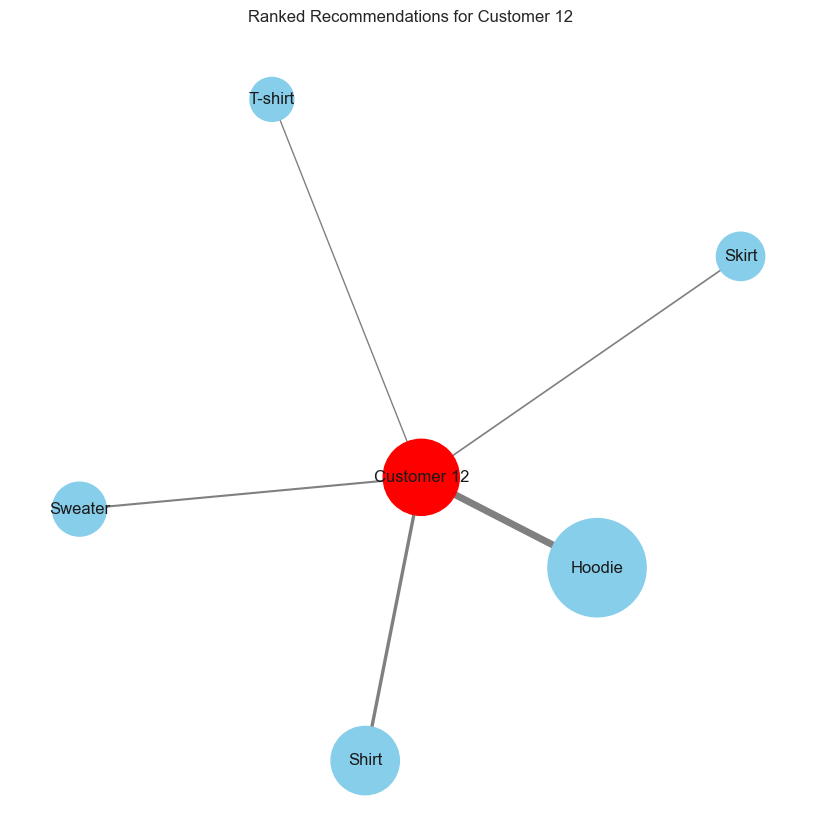

In [41]:
import networkx as nx

def visualize_recommendations(customer_id, n_recommendations=5):
    recommendations = recommend_customers(customer_id, n_recommendations)
    min_size, max_size = 1000, 5000
    scores = recommendations['Score']
    scaled_sizes = min_size + (max_size - min_size) * (scores - scores.min()) / (scores.max() - scores.min())

    G = nx.Graph()
    G.add_node(f"Customer {customer_id}", color="red", size=3000)

    # Add recommended items as nodes
    for (item, size) in zip(recommendations['Item Purchased'], scaled_sizes):
        G.add_node(item, color="skyblue", size=size)
        G.add_edge(f"Customer {customer_id}", item, weight=size / 1000)
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)

    node_colors = [G.nodes[n]["color"] for n in G.nodes]
    node_sizes = [G.nodes[n]["size"] for n in G.nodes]
    edge_weights = [G[u][v]['weight'] for u, v in G.edges]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color="gray", width=edge_weights)
    plt.title(f"Ranked Recommendations for Customer {customer_id}")
    plt.show()

customer_id =12
visualize_recommendations(customer_id, n_recommendations=5)

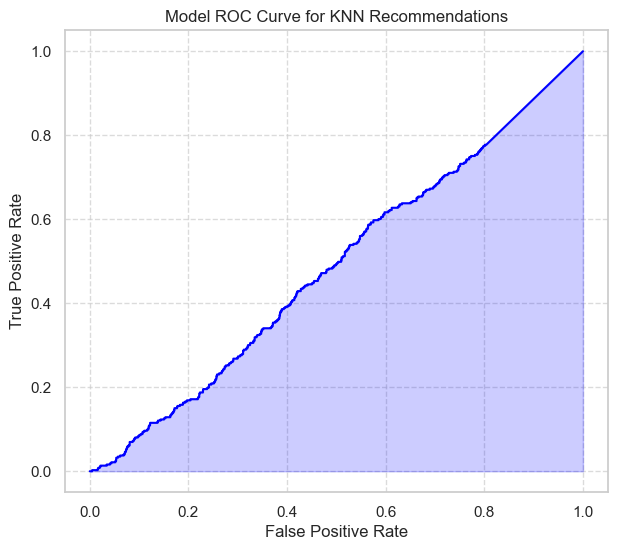

In [42]:
def plot_model_roc_curve():
    y_true = []
    y_scores = []
    transformed_data = knn_pipeline[:-1].transform(data[features])

    for customer_id in data['Customer ID'].unique()[:500]:
        if customer_id not in data['Customer ID'].values:
            continue

        customer_index = data[data['Customer ID'] == customer_id].index[0]

        # Find neighbors once
        distances, indices = knn_pipeline.named_steps['knn'].kneighbors(
            [transformed_data[customer_index]], n_neighbors=6
        )

        for i in range(1, 6):
            recommended_index = indices[0][i]
            recommended_item = data.iloc[recommended_index]['Item Purchased']

            is_relevant = int(recommended_item in data[data['Customer ID'] == customer_id]['Item Purchased'].values)
            y_true.append(is_relevant)

            score = 1 - (distances[0][i] / np.max(distances))
            y_scores.append(score)


    if len(y_true) > 0 and len(y_scores) > 0:
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, linestyle='-', color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.fill_between(fpr, tpr, alpha=0.2, color="blue")  # Shaded area
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Model ROC Curve for KNN Recommendations')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("No valid recommendation data available for ROC computation.")
plot_model_roc_curve()

In [44]:
#collaborative filtering
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

ratings_df = df[['Customer ID', 'Item Purchased', 'Review Rating']].copy()
product_name_mapping = {name: i for i, name in enumerate(ratings_df['Item Purchased'].unique())}

product_code_to_name = {i: name for name, i in product_name_mapping.items()}

ratings_df['Item Code'] = ratings_df['Item Purchased'].map(product_name_mapping)

# Define the Surprise Reader (assumes ratings from 0 to 5)
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_df[['Customer ID', 'Item Code', 'Review Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

def recommend_items(user_id, num_recommendations=5):
    # Get all unique item codes
    unique_items = ratings_df['Item Code'].unique()

    # Get items the user has already rated
    user_rated_items = ratings_df[ratings_df['Customer ID'] == user_id]['Item Code'].values

    # Find items the user hasn't rated yet
    items_to_predict = [item for item in unique_items if item not in user_rated_items]

    # Generate predictions for these items
    predictions = [model.predict(user_id, item) for item in items_to_predict]
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Return product names and estimated ratings
    return [(product_code_to_name[int(pred.iid)], pred.est)
            for pred in predictions[:num_recommendations]]
user_id = 12
recommendations = recommend_items(user_id)
print(f"\nTop recommendations for User {user_id}:")
for product_name, rating in recommendations:
    print(f"  {product_name}: {rating:.2f}")

RMSE: 0.7233
RMSE: 0.7232544046236402

Top recommendations for User 12:
  Sandals: 4.07
  Sweater: 4.06
  Scarf: 4.04
  Sneakers: 3.98
  Shoes: 3.96


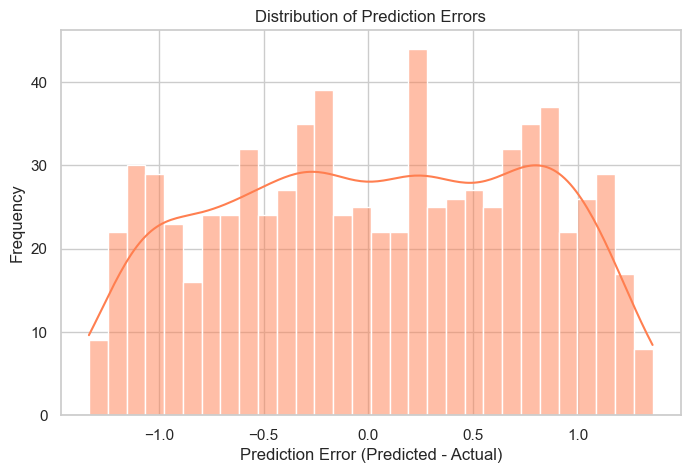

In [45]:
errors = np.array([pred.est - pred.r_ui for pred in predictions])
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

In [46]:
#content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df['combined_features'] = df[['Item Purchased', 'Category', 'Color', 'Season', 'Review Rating']].astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(item_name, df, cosine_sim):
    idx = df[df['Item Purchased'] == item_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Filter out the exact same item
    filtered_scores = [i for i in sim_scores if df.iloc[i[0]]['Item Purchased'] != item_name]

    filtered_scores = filtered_scores[:5]
    item_indices = [i[0] for i in filtered_scores]
    return df.iloc[item_indices][['Item Purchased', 'Category', 'Color', 'Season', 'Review Rating']]

item_to_recommend = "Handbag"
recommendations = get_recommendations(item_to_recommend, df, cosine_sim)
print(recommendations)

     Item Purchased     Category Color  Season  Review Rating
1658        Jewelry  Accessories  Pink  Spring            4.1
104      Sunglasses  Accessories  Pink  Spring            4.4
1204           Belt  Accessories  Pink  Spring            3.2
2111     Sunglasses  Accessories  Pink  Spring            2.6
3640     Sunglasses  Accessories  Pink  Spring            4.0


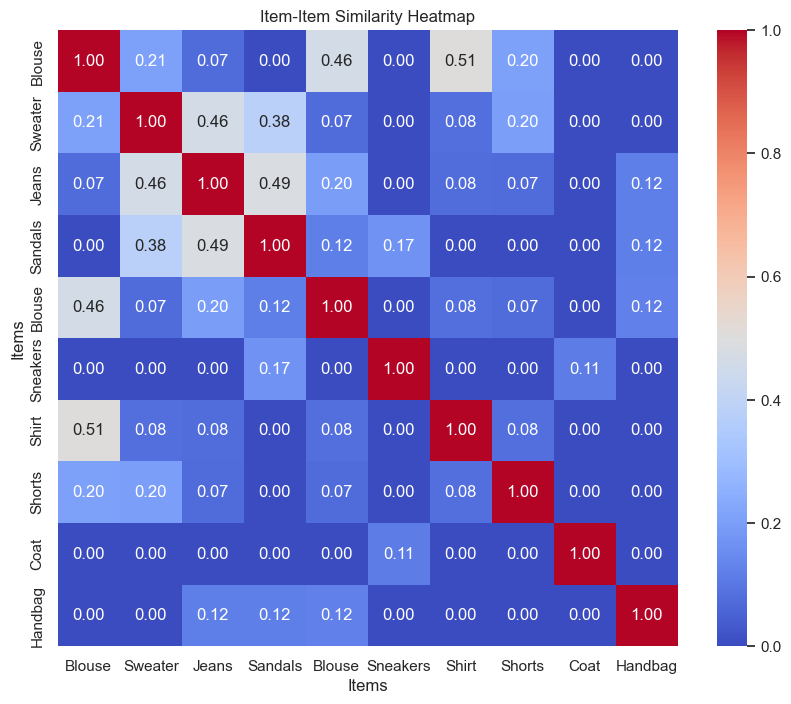

In [47]:
def plot_similarity_heatmap(df, cosine_sim, top_n=10):
    item_names = df['Item Purchased'][:top_n]
    similarity_subset = cosine_sim[:top_n, :top_n]
    sim_df = pd.DataFrame(similarity_subset, index=item_names, columns=item_names)

    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_df, cmap="coolwarm", annot=True, fmt=".2f")
    plt.xlabel("Items")
    plt.ylabel("Items")
    plt.title("Item-Item Similarity Heatmap")
    plt.show()
plot_similarity_heatmap(df, cosine_sim, top_n=10)

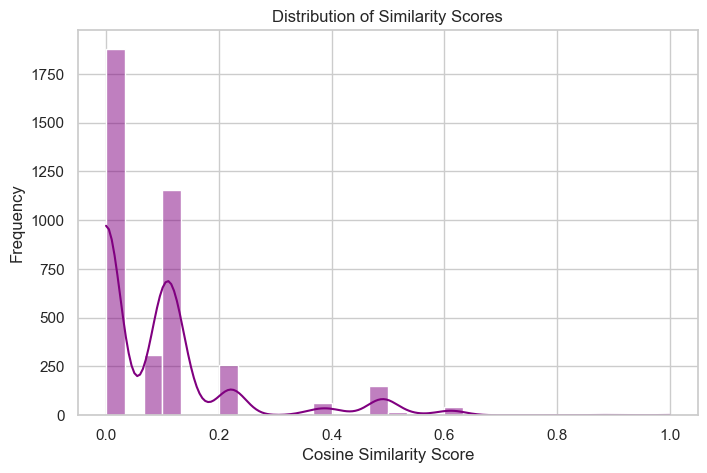

In [48]:
import numpy as np

sim_scores = cosine_sim[df[df["Item Purchased"] == item_to_recommend].index[0]]
plt.figure(figsize=(8, 5))
sns.histplot(sim_scores, bins=30, kde=True, color="purple")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Similarity Scores")
plt.show()

In [49]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

#collaborative Filtering
ratings_df = df[['Customer ID', 'Item Purchased', 'Review Rating']].copy()

# Create mappings for product names to numerical codes
product_name_mapping = {name: i for i, name in enumerate(ratings_df['Item Purchased'].unique())}
product_code_to_name = {i: name for name, i in product_name_mapping.items()}

ratings_df['Item Code'] = ratings_df['Item Purchased'].map(product_name_mapping)

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_df[['Customer ID', 'Item Code', 'Review Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

# content-based filtering
df['combined_features'] = df[['Item Purchased', 'Category', 'Color', 'Season', 'Review Rating']].astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#hybrid recommendation system
def get_content_based_recommendations(item_name, num_recommendations=5):
    idx = df[df['Item Purchased'] == item_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    filtered_scores = [i for i in sim_scores if df.iloc[i[0]]['Item Purchased'] != item_name]
    filtered_scores = filtered_scores[:num_recommendations]
    item_indices = [i[0] for i in filtered_scores]
    return df.iloc[item_indices][['Item Purchased', 'Category', 'Color', 'Season', 'Review Rating']]

def recommend_items_hybrid(user_id, num_recommendations=5):
    unique_items = ratings_df['Item Code'].unique()
    user_rated_items = ratings_df[ratings_df['Customer ID'] == user_id]['Item Code'].values
    items_to_predict = [item for item in unique_items if item not in user_rated_items]

    # Generate predictions using Collaborative Filtering
    cf_predictions = [model.predict(user_id, item) for item in items_to_predict]
    cf_predictions.sort(key=lambda x: x.est, reverse=True)

    hybrid_scores = {}
    for pred in cf_predictions:
        item_name = product_code_to_name[int(pred.iid)]
        hybrid_scores[item_name] = pred.est

    # Content-Based Filtering Enhancement
    for item in list(hybrid_scores.keys()):
        content_based_recs = get_content_based_recommendations(item, num_recommendations)
        for _, rec in content_based_recs.iterrows():
            rec_item = rec['Item Purchased']
            similarity_score = cosine_sim[df[df['Item Purchased'] == item].index[0], df[df['Item Purchased'] == rec_item].index[0]]
            hybrid_scores[rec_item] = hybrid_scores.get(rec_item, 0) + similarity_score

    # Adjust scores based on color
    user_preferred_colors = df[df['Customer ID'] == user_id]['Color'].values
    preferred_color = user_preferred_colors[0] if len(user_preferred_colors) > 0 else None

    for item in list(hybrid_scores.keys()):
        item_color = df[df['Item Purchased'] == item]['Color'].values[0]
        if preferred_color and item_color.lower() == preferred_color.lower():
            hybrid_scores[item] *= 1.2

    sorted_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]

    return [{
        "Item Name": item,
        "Category": df[df['Item Purchased'] == item]['Category'].values[0],
        "Color": df[df['Item Purchased'] == item]['Color'].values[0],
        "Season": df[df['Item Purchased'] == item]['Season'].values[0],
        "Predicted Rating": next((pred.est for pred in cf_predictions if product_code_to_name[int(pred.iid)] == item), None),
        "Final Score": hybrid_scores[item]
    } for item, _ in sorted_recommendations]

user_id = 12
recommendations = recommend_items_hybrid(user_id)

print(f"\nTop {len(recommendations)} Recommendations for User {user_id}:")
print("=" * 60)
for idx, rec in enumerate(recommendations, 1):
    print(f"{idx}. {rec['Item Name']} ({rec['Category']})")
    print(f"   Color: {rec['Color']}, Season: {rec['Season']}")
    print(f"   Predicted Rating: {rec['Predicted Rating']:.2f}, Final Score: {rec['Final Score']:.2f}")


Top 5 Recommendations for User 12:
1. T-shirt (Clothing)
   Color: Violet, Season: Spring
   Predicted Rating: 3.78, Final Score: 9.57
2. Jewelry (Accessories)
   Color: Red, Season: Spring
   Predicted Rating: 3.73, Final Score: 6.83
3. Shirt (Clothing)
   Color: Gray, Season: Fall
   Predicted Rating: 3.64, Final Score: 6.79
4. Belt (Accessories)
   Color: Yellow, Season: Spring
   Predicted Rating: 3.76, Final Score: 5.40
5. Sunglasses (Accessories)
   Color: Gray, Season: Spring
   Predicted Rating: 3.73, Final Score: 5.17


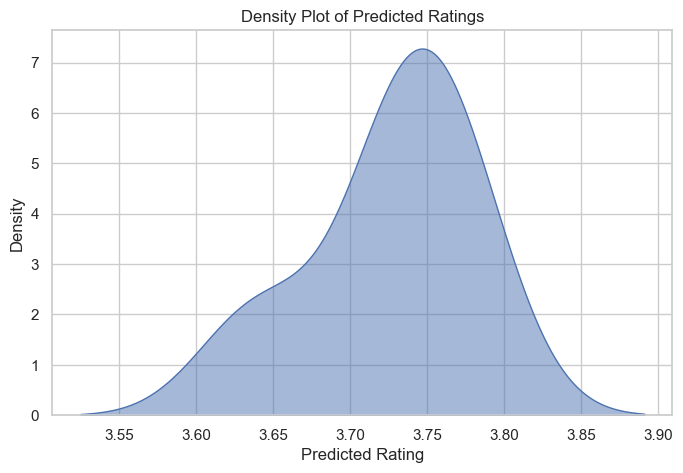

In [50]:
plt.figure(figsize=(8, 5))
predicted_ratings = [rec['Predicted Rating'] for rec in recommendations if rec['Predicted Rating'] is not None]
sns.kdeplot(predicted_ratings, fill=True, color="b", alpha=0.5)
plt.xlabel("Predicted Rating")
plt.ylabel("Density")
plt.title("Density Plot of Predicted Ratings")
plt.grid(True)
plt.show()


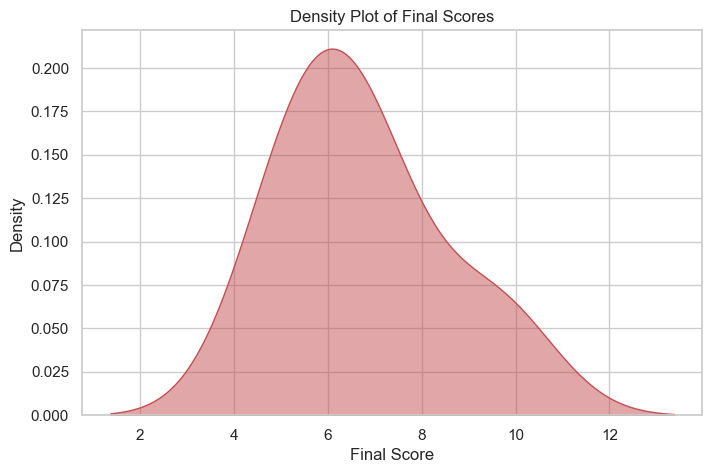

In [51]:
plt.figure(figsize=(8, 5))
final_scores = [rec['Final Score'] for rec in recommendations]
sns.kdeplot(final_scores, fill=True, color="r", alpha=0.5)
plt.xlabel("Final Score")
plt.ylabel("Density")
plt.title("Density Plot of Final Scores")
plt.grid(True)
plt.show()